In [3]:
from scipy import signal
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [4]:
numtaps = 6439
f = 0.01
win = signal.firwin(numtaps, f)

Text(0.5, 1.0, 'FIR coefficients')

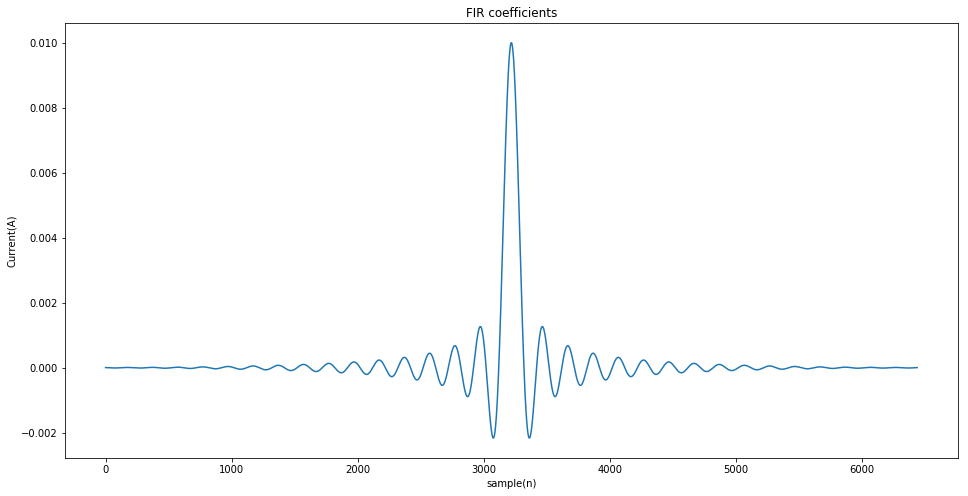

In [5]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(16,8))
ax.plot(win)
ax.set_ylabel('Current(A)')
ax.set_xlabel('sample(n)')
ax.set_title('FIR coefficients')

In [6]:
def cosseno(Amp,Fase,Np,Freq,Fs):
    incremento=1/Fs
    t = np.linspace(0, incremento*(Np-1), Np)
    y=Amp*np.cos(2*np.pi*Freq*t+(Fase*np.pi/180))
    return [y, t]

In [7]:
fs = 2e6;
Fase = 45;
Np = 200e3;
percentual_de_corte = 0.1;

[y, t] = cosseno(120,Fase,Np,60,fs);
[y1, t] = cosseno(50,Fase,Np,15e3,fs);

# create a new signal to apply the filter FIR
yt = 100 + y + y1;

/home/palmdev/anaconda3/envs/palmdev/lib/python3.7/site-packages/ipykernel_launcher.py:3: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.
  This is separate from the ipykernel package so we can avoid doing imports until


Text(0.5, 1.0, 'Sinusoidal with white noise')

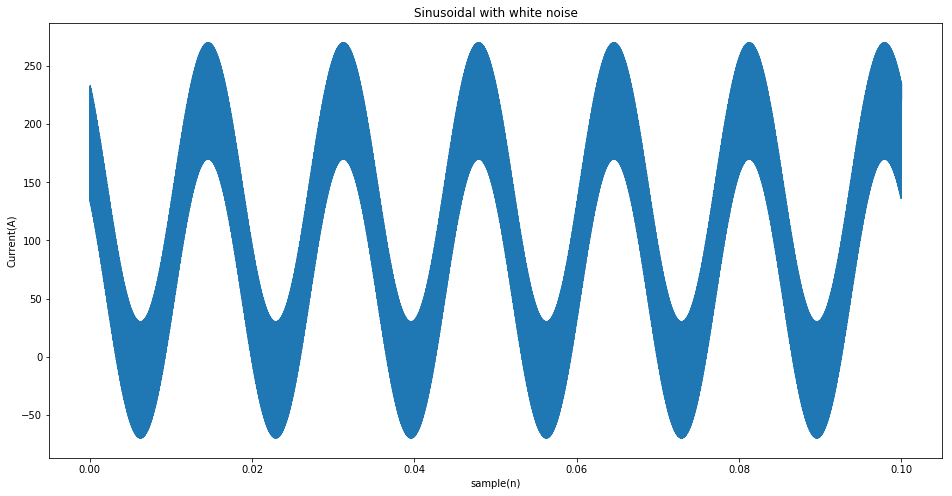

In [8]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(16,8))
ax.plot(t, yt)
ax.set_ylabel('Current(A)')
ax.set_xlabel('sample(n)')
ax.set_title('Sinusoidal with white noise')

In [9]:
filtered = signal.convolve(yt, win, mode='full')

Text(0.5, 1.0, 'Sinusoidal with white noise')

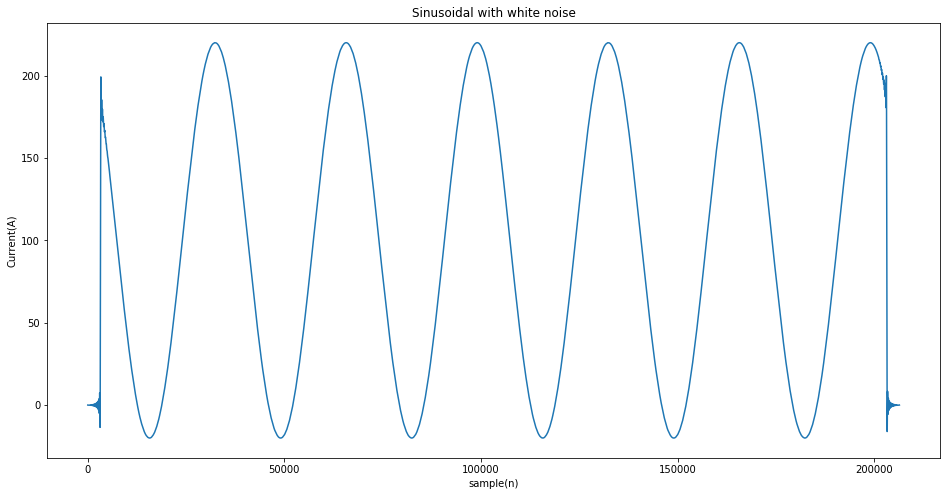

In [10]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(16,8))
ax.plot(filtered)
ax.set_ylabel('Current(A)')
ax.set_xlabel('sample(n)')
ax.set_title('Sinusoidal with white noise')

## Terefa Módulo 1

### Etapa 1: filtro analógico

Como a frequência de interesse é em 3kHz, podemos usar essa freq como a de corte

Filtro de seguda ordem 20db/dec necessitando de 2 decada para frequencia max, onde 600kHz freq de amostragem

Alternativamente, a frequencia de corte será uma década acima, para não acarretar em distorções na banda de interesse, e a atenuação deve ser de 1000 vezes

In [11]:
fs = 600e3;
Fase = 45;
Np = 10e3;
percentual_de_corte = 0.1;

[y, t] = cosseno(100,Fase,Np,2e3,fs);
[y1, t] = cosseno(100,Fase,Np,5e3,fs);

yt = y + y1;

/home/palmdev/anaconda3/envs/palmdev/lib/python3.7/site-packages/ipykernel_launcher.py:3: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.
  This is separate from the ipykernel package so we can avoid doing imports until


Text(0.5, 1.0, 'Sinusoidal with white noise')

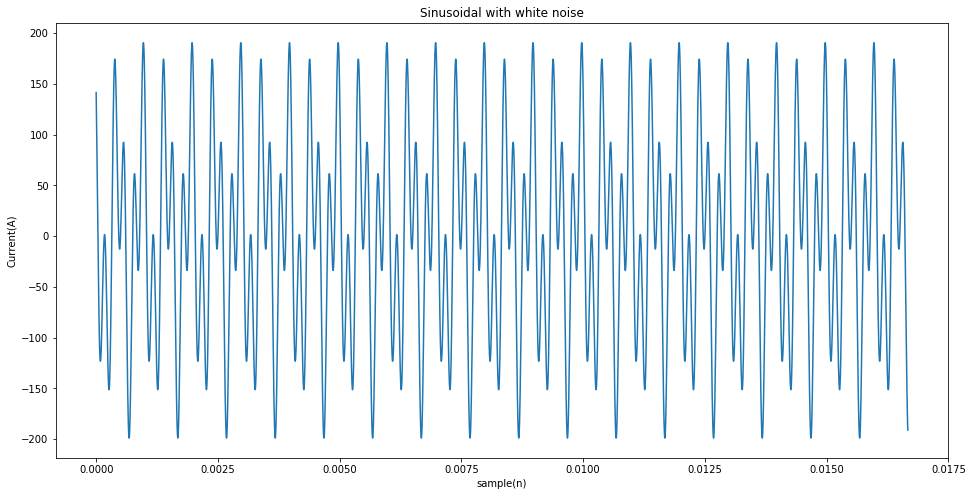

In [12]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(16,8))
ax.plot(t, yt)
ax.set_ylabel('Current(A)')
ax.set_xlabel('sample(n)')
ax.set_title('Sinusoidal with white noise')

In [13]:
# Parks-McClellan
sigma_passagem_percentual=0.1
sigma_atenuacao_percentual=0.1
sigma_passagem=sigma_passagem_percentual/100
sigma_atenuacao=sigma_atenuacao_percentual/100
Fs=600e3;
F_passagem=3e3/Fs;
F_atenuacao=3.5e3/Fs;

N=1+(-20*(np.log10(np.sqrt(sigma_passagem*sigma_atenuacao)))-13)/(14.6*(F_atenuacao-F_passagem))

f = 0.01 # 1 --> 300k ; f --> 

win = signal.firwin(int(N), f)

Text(0.5, 1.0, 'Sinusoidal with white noise')

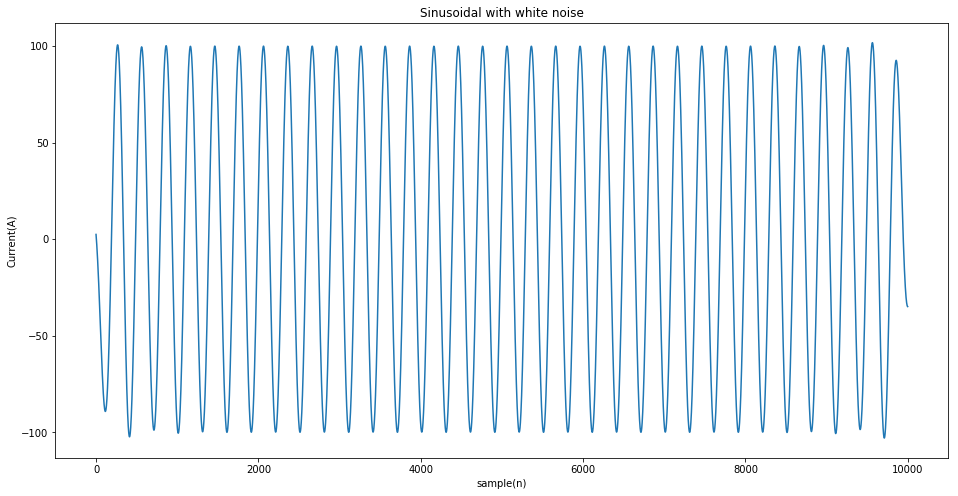

In [14]:
filtered = signal.convolve(yt, win, mode='same')

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(16,8))
ax.plot(filtered)
ax.set_ylabel('Current(A)')
ax.set_xlabel('sample(n)')
ax.set_title('Sinusoidal with white noise')

Filtro IIR

Primeiro se cria um filtro com fcorte em 1/fs, e divida a freq no momento do design

In [15]:
def myfilter(b,a,x):
    N = len(x)
    Nb = len(b)
    Na = len(a)
    y = np.zeros(N-1)
    
    for n in range(N-1):
        sumb=0
        for m in range(Nb):
            if (n-m)>=0:
                sumb=sumb+b[m]*x[n-m]
        
        suma=0
        for m in range(Na):
            if (n-m)>=0:
                suma=suma+a[m]*y[n-m]
        y[n]=(1/a[0])*(sumb-suma)
    return y

In [16]:
b0 = [0.0002383155229323235, 0.000476631045864647, 0.0002383155229323235]
a0 = [1.0, -1.965034979834595, 0.9661045574933017]

b1 = [0.0009370911456515144, 0.0018741822913030289, 0.0009370911456515144]
a1 = [1.0, -1.929169817354214 ,0.9333755515893499]

b2 = [0.0036233785905847413, 0.0072467571811694826, 0.0036233785905847413]
a2 = [1.0, -1.8550593923656644, 0.8713213829478993]

b3 = [2.141879507350588e-13, 2.356067458085647e-12, 1.1780337290428234e-11, 3.5341011871284706e-11, 7.068202374256941e-11, 9.895483323959716e-11,
     9.895483323959716e-11, 7.068202374256941e-11, 3.5341011871284706e-11, 1.1780337290428234e-11, 2.356067458085647e-12, 2.141879507350588e-13]
a3 = [1.0, -10.599082724996663, 51.233343189526295, -149.0781769979583, 290.13398278622583, -396.53906402656685, 388.36686002345914,
      -272.55914979962165, 134.32690008195019, -44.27475560298013, 8.783769247289525, -0.7946261758886765]

In [17]:
filtered0 = signal.filtfilt(b0, a0, yt)
filtered1 = signal.filtfilt(b1, a1, filtered0[::2])
filtered2 = signal.filtfilt(b2, a2, filtered1[::2])
filtered3 = signal.filtfilt(b3, a3, filtered2[::2])
filtered4 = filtered3[::10]

/home/palmdev/anaconda3/envs/palmdev/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3118: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/home/palmdev/anaconda3/envs/palmdev/lib/python3.7/site-packages/numpy/core/_methods.py:85: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


nan

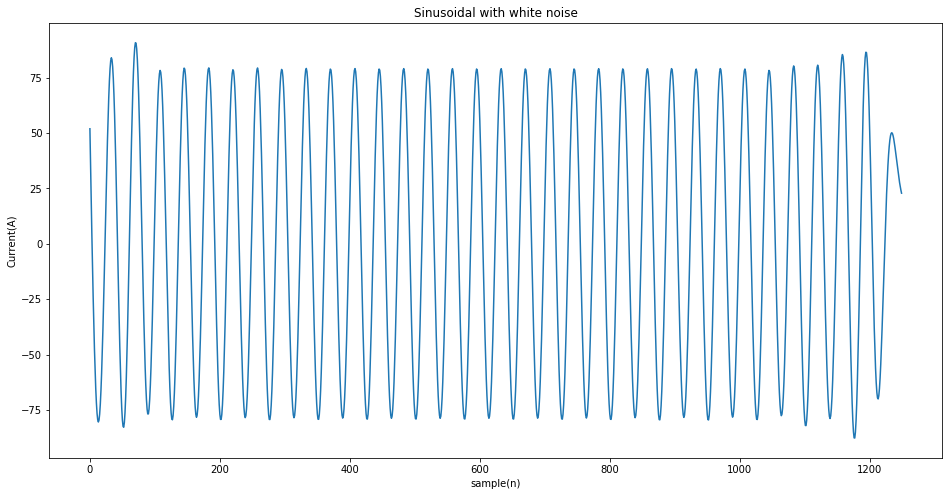

In [18]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(16,8))
#ax.plot(filtered4)
ax.plot(filtered3)
ax.set_ylabel('Current(A)')
ax.set_xlabel('sample(n)')
ax.set_title('Sinusoidal with white noise')

100*(np.sqrt(np.mean(filtered4[200:len(filtered4)-200]**2)) - 100/(np.sqrt(2)))/(100/(np.sqrt(2)))

# DFS

In [ ]:
from scipy.fftpack import fft

def dfs(x,fs,percentual_de_corte):
    x=x(:);
    X=fft(x);
    N=length(x);
    an= 2*real(X/N);
    bn=-2*imag(X/N);
    an(1)=(X(1))/N;
    an=an(1:floor(N/2));
    bn=bn(1:floor(N/2));
    Cn=sqrt(an.^2+bn.^2);
    Cn(1)=an(1);
    Fn=(180/pi)*atan(-bn./an);
    incremento=fs/(2*length(Cn));
    f=0:incremento:incremento*(length(Cn)-1);
    f=f(:);       Cn=Cn(:);    Fn=Fn(:);
    Cn(find(Cn<(max(abs(Cn))*percentual_de_corte/100)))=0;
    Fn(find(Cn<(max(abs(Cn))*percentual_de_corte/100)))=0;